In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 999)

In [3]:
name_basics = pd.read_csv('../data/zippedData/imdb.name.basics.csv')
title_akas = pd.read_csv('../data/zippedData/imdb.title.akas.csv')
title_basics = pd.read_csv('../data/zippedData/imdb.title.basics.csv')
title_crew = pd.read_csv('../data/zippedData/imdb.title.crew.csv')
title_principals = pd.read_csv('../data/zippedData/imdb.title.principals.csv')
title_ratings = pd.read_csv('../data/zippedData/imdb.title.ratings.csv')

In [4]:
import warnings
warnings.filterwarnings('ignore')

# IMDB Name Basics

In [5]:
name_basics

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN


In [6]:
name_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


In [7]:
name_basics.isna().sum()

nconst                     0
primary_name               0
birth_year            523912
death_year            599865
primary_profession     51340
known_for_titles       30204
dtype: int64

In [8]:
name_basics.duplicated().sum()

0

# Removing the deceased

In [9]:
name_basics = name_basics[(name_basics['death_year'].isna())]
name_basics

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN


In [10]:
name_basics.isna().sum()

nconst                     0
primary_name               0
birth_year            523401
death_year            599865
primary_profession     50548
known_for_titles       30099
dtype: int64

In [11]:
name_basics['directors'] = name_basics['nconst']
name_basics['writers'] = name_basics['nconst']

In [12]:
name_basics

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,directors,writers
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553",nm0061671,nm0061671
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",nm0061865,nm0061865
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898",nm0062070,nm0062070
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387",nm0062195,nm0062195
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256",nm0062798,nm0062798
...,...,...,...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN,nm9990381,nm9990381
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130",nm9990690,nm9990690
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610",nm9991320,nm9991320
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN,nm9991786,nm9991786


In [13]:
name_basics.duplicated().sum()

0

# IMDB Title AKAS

In [14]:
title_akas

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,NaN,NaN,original,NaN,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0
331700,tt9880178,1,La atención,NaN,NaN,original,NaN,1.0
331701,tt9880178,2,La atención,ES,NaN,NaN,NaN,0.0


In [15]:
title_akas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [16]:
title_akas.isna().sum()

title_id                  0
ordering                  0
title                     0
region                53293
language             289988
types                163256
attributes           316778
is_original_title        25
dtype: int64

# Renaming first column to match for merge

In [17]:
title_akas.rename(columns = {'title_id':'tconst'},inplace=True)

In [18]:
title_akas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   tconst             331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [19]:
title_akas.duplicated().sum()

0

# IMDB Title Basics

In [20]:
title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [21]:
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [22]:
title_basics.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [23]:
title_basics.duplicated().sum()

0

# Replacing the runtime_minutes with the mean of the column since we're only missing 20% of our data

In [24]:
title_basics['runtime_minutes'].fillna(title_basics['runtime_minutes'].mean(), inplace=True)

In [25]:
title_basics.isna().sum()

tconst                0
primary_title         0
original_title       21
start_year            0
runtime_minutes       0
genres             5408
dtype: int64

# IMDB Title Crew

In [26]:
title_crew.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [27]:
title_crew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     146144 non-null  object
 1   directors  140417 non-null  object
 2   writers    110261 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


In [28]:
title_crew.isna().sum()

tconst           0
directors     5727
writers      35883
dtype: int64

In [29]:
title_crew.duplicated().sum()

0

# IMDB Title Principals

In [30]:
title_principals.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [31]:
title_principals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   tconst      1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   nconst      1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


In [32]:
title_principals.isna().sum()

tconst             0
ordering           0
nconst             0
category           0
job           850502
characters    634826
dtype: int64

In [33]:
title_principals.duplicated().sum()

0

# IMDB Title Ratings

In [34]:
title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [35]:
title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [36]:
title_ratings.isna().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

In [37]:
title_ratings.duplicated().sum()

0

# Merging all tables

In [38]:
name_principals = pd.merge(name_basics, title_principals, on='nconst')
name_principals

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,directors,writers,tconst,ordering,category,job,characters
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553",nm0061671,nm0061671,tt2398241,9,producer,producer,NaN
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",nm0061865,nm0061865,tt0433397,7,composer,NaN,NaN
2,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",nm0061865,nm0061865,tt1681372,8,composer,NaN,NaN
3,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",nm0061865,nm0061865,tt2387710,8,composer,NaN,NaN
4,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",nm0061865,nm0061865,tt2281215,7,composer,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016064,nm9990381,Susan Grobes,NaN,NaN,actress,NaN,nm9990381,nm9990381,tt6527982,2,actress,NaN,"[""Cheryl"",""Gypsy""]"
1016065,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130",nm9990690,nm9990690,tt8737130,4,actress,NaN,NaN
1016066,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610",nm9991320,nm9991320,tt8734436,3,actress,NaN,"[""Anna""]"
1016067,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN,nm9991786,nm9991786,tt8739240,9,producer,producer,NaN


In [39]:
name_principals_ratings = pd.merge(name_principals, title_ratings, on='tconst')
name_principals_ratings

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,directors,writers,tconst,ordering,category,job,characters,averagerating,numvotes
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553",nm0061671,nm0061671,tt2398241,9,producer,producer,NaN,6.0,15612
1,nm0038432,Kelly Asbury,1960.0,NaN,"art_department,animation_department,director","tt0298148,tt0101414,tt0166813,tt0377981",nm0038432,nm0038432,tt2398241,5,director,NaN,NaN,6.0,15612
2,nm0449549,Jordan Kerner,NaN,NaN,"producer,actor,executive","tt0101921,tt0141369,tt0119190,tt0108333",nm0449549,nm0449549,tt2398241,10,producer,producer,NaN,6.0,15612
3,nm0962596,Pamela Ribon,1975.0,NaN,"writer,producer,actress","tt0898332,tt3521164,tt5848272,tt2458776",nm0962596,nm0962596,tt2398241,7,writer,written by,NaN,6.0,15612
4,nm0542133,Joe Manganiello,1976.0,NaN,"actor,stunts,producer","tt0974015,tt2268016,tt0844441,tt0837156",nm0542133,nm0542133,tt2398241,3,actor,NaN,"[""Hefty Smurf""]",6.0,15612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621361,nm8482246,Marco Niemeijer,NaN,NaN,"director,writer,cinematographer","tt7708926,tt5132170",nm8482246,nm8482246,tt7708926,1,director,NaN,NaN,7.0,9
621362,nm6870672,Sandy Ding,NaN,NaN,"director,writer,producer","tt6441144,tt4150214,tt5918088",nm6870672,nm6870672,tt5918088,1,director,NaN,NaN,7.5,20
621363,nm6930231,Park Bum-Soo,NaN,NaN,"director,writer","tt4219354,tt4773564",nm6930231,nm6930231,tt4773564,1,director,NaN,NaN,5.6,7
621364,nm8481580,Aleksey Bystritskiy,NaN,NaN,director,"tt6112166,tt7424890",nm8481580,nm8481580,tt6112166,1,director,NaN,NaN,4.8,5


In [40]:
name_principals_ratings_crew = pd.merge(title_crew, name_principals_ratings, on='tconst')
name_principals_ratings_crew

,tconst,directors_x,writers_x,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,directors_y,writers_y,ordering,category,job,characters,averagerating,numvotes
0,tt0285252,nm0899854,nm0899854,nm0120025,Kim Bullard,NaN,NaN,"composer,soundtrack,music_department","tt0147800,tt0117865,tt0372588,tt8889506",nm0120025,nm0120025,9,composer,NaN,NaN,3.9,219
1,tt0285252,nm0899854,nm0899854,nm0000686,Christopher Walken,1943.0,NaN,"actor,soundtrack,miscellaneous","tt0077416,tt0264464,tt1931533,tt0427327",nm0000686,nm0000686,3,actor,NaN,"[""Roy Callahan""]",3.9,219
2,tt0285252,nm0899854,nm0899854,nm0899854,Tony Vitale,1964.0,NaN,"producer,director,writer","tt0285252,tt0106489,tt0119465,tt0359774",nm0899854,nm0899854,5,director,NaN,NaN,3.9,219
3,tt0285252,nm0899854,nm0899854,nm0001822,Robert Wagner,1930.0,NaN,"actor,producer,soundtrack","tt0072308,tt0118655,tt0295178,tt0106770",nm0001822,nm0001822,4,actor,NaN,"[""Tom Wald""]",3.9,219
4,tt0285252,nm0899854,nm0899854,nm0009272,Richard Gilbert Abramson,NaN,NaN,"producer,director","tt0096926,tt0114658,tt0090500,tt0089791",nm0009272,nm0009272,6,producer,producer,NaN,3.9,219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621361,tt9004986,nm4993825,nm4993825,nm1145570,John Erik Kaada,1975.0,NaN,"composer,music_department,soundtrack","tt3202392,tt3650484,tt3346824,tt1153110",nm1145570,nm1145570,7,composer,NaN,NaN,8.4,7
621362,tt9004986,nm4993825,nm4993825,nm4993825,Fredrik Horn Akselsen,NaN,NaN,"director,writer,assistant_director","tt2368989,tt9737848,tt9004986,tt4517204",nm4993825,nm4993825,5,director,NaN,NaN,8.4,7
621363,tt9004986,nm4993825,nm4993825,nm6197807,Torstein Nodland,NaN,NaN,"cinematographer,camera_department","tt9004986,tt8571630,tt3447810,tt9737848",nm6197807,nm6197807,9,cinematographer,NaN,NaN,8.4,7
621364,tt9004986,nm4993825,nm4993825,nm6450115,Thomas Kjær Olsen,NaN,NaN,actor,tt3688926,nm6450115,nm6450115,3,actor,NaN,"[""Young Mads Ousdal""]",8.4,7


In [41]:
name_principals_ratings_crew_basics = pd.merge(title_basics, name_principals_ratings_crew, on='tconst')
name_principals_ratings_crew_basics

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,directors_x,writers_x,nconst,primary_name,...,primary_profession,known_for_titles,directors_y,writers_y,ordering,category,job,characters,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",nm0347899,Gulzar,...,"music_department,writer,soundtrack","tt0091256,tt0178186,tt1010048,tt2176013",nm0347899,nm0347899,8,writer,dialogue,NaN,7.0,77
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",nm0904537,Vyjayanthimala,...,"actress,music_department,miscellaneous","tt0047990,tt0054910,tt0050665,tt0058547",nm0904537,nm0904537,2,actress,NaN,"[""Munni"",""Laila-E-Aasmaan""]",7.0,77
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",nm0474801,Dilip Kumar,...,"actor,writer,director","tt0058287,tt0054910,tt0047990,tt0084667",nm0474801,nm0474801,1,actor,NaN,"[""Kundan S. Prasad"",""Bajrangi""]",7.0,77
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",nm1391276,Anjana Rawail,...,"writer,costume_designer","tt0293499,tt0266712,tt0266757,tt0063540",nm1391276,nm1391276,9,writer,screenplay,NaN,7.0,77
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",nm0002411,NaN,nm0451809,Arun Khopkar,...,"director,actor,assistant_director","tt0231382,tt0231583,tt0232192,tt3693912",nm0451809,nm0451809,2,actor,NaN,"[""Kalidasa""]",7.2,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621361,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary,nm5684093,NaN,nm4241788,Tobias Borkert,...,"composer,music_department","tt8129666,tt6264034,tt1641810,tt4653186",nm4241788,nm4241788,4,composer,NaN,NaN,6.5,11
621362,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary,nm5684093,NaN,nm3256778,Tom Denoyette,...,"editor,editorial_department","tt1625150,tt7431570,tt5492502,tt2878178",nm3256778,nm3256778,6,editor,NaN,NaN,6.5,11
621363,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary,nm5684093,NaN,nm6969694,Rogier Timmermans,...,"cinematographer,camera_department","tt4160582,tt7941300",nm6969694,nm6969694,5,cinematographer,NaN,NaN,6.5,11
621364,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary,nm5684093,NaN,nm6460816,Nils Leidal,...,NaN,tt3698384,nm6460816,nm6460816,1,self,NaN,"[""Himself""]",6.5,11


# Final Table Merge

In [42]:
pd.set_option('display.max_columns', 500)

In [43]:
final_merge = pd.merge(title_akas, name_principals_ratings_crew_basics, on='tconst')
final_merge

,tconst,ordering_x,title,region,language,types,attributes,is_original_title,primary_title,original_title,start_year,runtime_minutes,genres,directors_x,writers_x,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,directors_y,writers_y,ordering_y,category,job,characters,averagerating,numvotes
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",nm0339460,Judy Greer,1975.0,NaN,"actress,producer,soundtrack","tt0369610,tt0337563,tt0478970,tt0988595",nm0339460,nm0339460,4,actress,NaN,"[""Karen""]",7.0,539338
1,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",nm0695435,Chris Pratt,1979.0,NaN,"actor,soundtrack,producer","tt1490017,tt0369610,tt1266020,tt2015381",nm0695435,nm0695435,1,actor,NaN,"[""Owen""]",7.0,539338
2,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",nm0397171,Bryce Dallas Howard,1981.0,NaN,"actress,director,writer","tt1454029,tt0369610,tt1800302",nm0397171,nm0397171,2,actress,NaN,"[""Claire""]",7.0,539338
3,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",nm0798646,Amanda Silver,1963.0,NaN,"writer,producer,actress","tt2103281,tt1318514,tt0369610,tt3450958",nm0798646,nm0798646,7,writer,screenplay by,NaN,7.0,539338
4,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",nm1119880,Colin Trevorrow,1976.0,NaN,"writer,producer,director","tt0369610,tt4881806,tt4572792,tt1862079",nm1119880,nm1119880,5,director,NaN,NaN,7.0,539338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380443,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0,Farewell Song,Sayonara kuchibiru,2019,116.0,"Music,Romance",nm0794048,nm0794048,nm5282266,Mugi Kadowaki,NaN,NaN,actress,"tt3108170,tt4651928,tt9827784,tt8764582",nm5282266,nm5282266,1,actress,NaN,"[""Haru""]",7.7,6
2380444,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0,Farewell Song,Sayonara kuchibiru,2019,116.0,"Music,Romance",nm0794048,nm0794048,nm5862455,Nana Komatsu,NaN,NaN,"actress,soundtrack","tt4912452,tt0490215,tt5108912,tt3108158",nm5862455,nm5862455,2,actress,NaN,"[""Reo""]",7.7,6
2380445,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0,Farewell Song,Sayonara kuchibiru,2019,116.0,"Music,Romance",nm0794048,nm0794048,nm4869921,Masaki Naito,1981.0,NaN,actor,"tt7268368,tt2267524,tt9827784,tt3502172",nm4869921,nm4869921,10,actor,NaN,NaN,7.7,6
2380446,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0,Farewell Song,Sayonara kuchibiru,2019,116.0,"Music,Romance",nm0794048,nm0794048,nm6954008,Ryô Narita,NaN,NaN,actor,"tt10127410,tt5311514,tt5031744,tt8531044",nm6954008,nm6954008,3,actor,NaN,"[""Shima""]",7.7,6


In [44]:
temp_table = final_merge
temp_table_1 = temp_table[temp_table['known_for_titles'].notna()]
temp_table_1

,tconst,ordering_x,title,region,language,types,attributes,is_original_title,primary_title,original_title,start_year,runtime_minutes,genres,directors_x,writers_x,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,directors_y,writers_y,ordering_y,category,job,characters,averagerating,numvotes
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",nm0339460,Judy Greer,1975.0,NaN,"actress,producer,soundtrack","tt0369610,tt0337563,tt0478970,tt0988595",nm0339460,nm0339460,4,actress,NaN,"[""Karen""]",7.0,539338
1,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",nm0695435,Chris Pratt,1979.0,NaN,"actor,soundtrack,producer","tt1490017,tt0369610,tt1266020,tt2015381",nm0695435,nm0695435,1,actor,NaN,"[""Owen""]",7.0,539338
2,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",nm0397171,Bryce Dallas Howard,1981.0,NaN,"actress,director,writer","tt1454029,tt0369610,tt1800302",nm0397171,nm0397171,2,actress,NaN,"[""Claire""]",7.0,539338
3,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",nm0798646,Amanda Silver,1963.0,NaN,"writer,producer,actress","tt2103281,tt1318514,tt0369610,tt3450958",nm0798646,nm0798646,7,writer,screenplay by,NaN,7.0,539338
4,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",nm1119880,Colin Trevorrow,1976.0,NaN,"writer,producer,director","tt0369610,tt4881806,tt4572792,tt1862079",nm1119880,nm1119880,5,director,NaN,NaN,7.0,539338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380443,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0,Farewell Song,Sayonara kuchibiru,2019,116.0,"Music,Romance",nm0794048,nm0794048,nm5282266,Mugi Kadowaki,NaN,NaN,actress,"tt3108170,tt4651928,tt9827784,tt8764582",nm5282266,nm5282266,1,actress,NaN,"[""Haru""]",7.7,6
2380444,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0,Farewell Song,Sayonara kuchibiru,2019,116.0,"Music,Romance",nm0794048,nm0794048,nm5862455,Nana Komatsu,NaN,NaN,"actress,soundtrack","tt4912452,tt0490215,tt5108912,tt3108158",nm5862455,nm5862455,2,actress,NaN,"[""Reo""]",7.7,6
2380445,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0,Farewell Song,Sayonara kuchibiru,2019,116.0,"Music,Romance",nm0794048,nm0794048,nm4869921,Masaki Naito,1981.0,NaN,actor,"tt7268368,tt2267524,tt9827784,tt3502172",nm4869921,nm4869921,10,actor,NaN,NaN,7.7,6
2380446,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0,Farewell Song,Sayonara kuchibiru,2019,116.0,"Music,Romance",nm0794048,nm0794048,nm6954008,Ryô Narita,NaN,NaN,actor,"tt10127410,tt5311514,tt5031744,tt8531044",nm6954008,nm6954008,3,actor,NaN,"[""Shima""]",7.7,6


In [45]:
z = [i.split(',') for i in temp_table_1['known_for_titles']]
temp_table_1['list_of_known'] = z
temp_table_1

,tconst,ordering_x,title,region,language,types,attributes,is_original_title,primary_title,original_title,start_year,runtime_minutes,genres,directors_x,writers_x,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,directors_y,writers_y,ordering_y,category,job,characters,averagerating,numvotes,list_of_known
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",nm0339460,Judy Greer,1975.0,NaN,"actress,producer,soundtrack","tt0369610,tt0337563,tt0478970,tt0988595",nm0339460,nm0339460,4,actress,NaN,"[""Karen""]",7.0,539338,"[tt0369610, tt0337563, tt0478970, tt0988595]"
1,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",nm0695435,Chris Pratt,1979.0,NaN,"actor,soundtrack,producer","tt1490017,tt0369610,tt1266020,tt2015381",nm0695435,nm0695435,1,actor,NaN,"[""Owen""]",7.0,539338,"[tt1490017, tt0369610, tt1266020, tt2015381]"
2,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",nm0397171,Bryce Dallas Howard,1981.0,NaN,"actress,director,writer","tt1454029,tt0369610,tt1800302",nm0397171,nm0397171,2,actress,NaN,"[""Claire""]",7.0,539338,"[tt1454029, tt0369610, tt1800302]"
3,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",nm0798646,Amanda Silver,1963.0,NaN,"writer,producer,actress","tt2103281,tt1318514,tt0369610,tt3450958",nm0798646,nm0798646,7,writer,screenplay by,NaN,7.0,539338,"[tt2103281, tt1318514, tt0369610, tt3450958]"
4,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",nm1119880,Colin Trevorrow,1976.0,NaN,"writer,producer,director","tt0369610,tt4881806,tt4572792,tt1862079",nm1119880,nm1119880,5,director,NaN,NaN,7.0,539338,"[tt0369610, tt4881806, tt4572792, tt1862079]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380443,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0,Farewell Song,Sayonara kuchibiru,2019,116.0,"Music,Romance",nm0794048,nm0794048,nm5282266,Mugi Kadowaki,NaN,NaN,actress,"tt3108170,tt4651928,tt9827784,tt8764582",nm5282266,nm5282266,1,actress,NaN,"[""Haru""]",7.7,6,"[tt3108170, tt4651928, tt9827784, tt8764582]"
2380444,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0,Farewell Song,Sayonara kuchibiru,2019,116.0,"Music,Romance",nm0794048,nm0794048,nm5862455,Nana Komatsu,NaN,NaN,"actress,soundtrack","tt4912452,tt0490215,tt5108912,tt3108158",nm5862455,nm5862455,2,actress,NaN,"[""Reo""]",7.7,6,"[tt4912452, tt0490215, tt5108912, tt3108158]"
2380445,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0,Farewell Song,Sayonara kuchibiru,2019,116.0,"Music,Romance",nm0794048,nm0794048,nm4869921,Masaki Naito,1981.0,NaN,actor,"tt7268368,tt2267524,tt9827784,tt3502172",nm4869921,nm4869921,10,actor,NaN,NaN,7.7,6,"[tt7268368, tt2267524, tt9827784, tt3502172]"
2380446,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0,Farewell Song,Sayonara kuchibiru,2019,116.0,"Music,Romance",nm0794048,nm0794048,nm6954008,Ryô Narita,NaN,NaN,actor,"tt10127410,tt5311514,tt5031744,tt8531044",nm6954008,nm6954008,3,actor,NaN,"[""Shima""]",7.7,6,"[tt10127410, tt5311514, tt5031744, tt8531044]"


In [46]:
testing = zip(title_basics['tconst'], title_basics['original_title'])
testing_1 = {t: o for t, o in testing}
testing_1['tt0369610']

'Jurassic World'

In [47]:
writers_1 = zip()

In [48]:
def title_finder(list_of_tconst):
    names = []
    for tconst in list_of_tconst:
        try:
            names.append(testing_1[tconst])
        except:
            names.append('no_title')
    return names
        
    

In [49]:
title_finder(temp_table_1['list_of_known'][0])

['Jurassic World', 'no_title', 'Ant-Man', 'no_title']

In [50]:
temp_table_1['the_list_of_known'] = temp_table_1['list_of_known'].apply(title_finder)

In [51]:
temp_table_1.head()

,tconst,ordering_x,title,region,language,types,attributes,is_original_title,primary_title,original_title,start_year,runtime_minutes,genres,directors_x,writers_x,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,directors_y,writers_y,ordering_y,category,job,characters,averagerating,numvotes,list_of_known,the_list_of_known
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",nm0339460,Judy Greer,1975.0,NaN,"actress,producer,soundtrack","tt0369610,tt0337563,tt0478970,tt0988595",nm0339460,nm0339460,4,actress,NaN,"[""Karen""]",7.0,539338,"[tt0369610, tt0337563, tt0478970, tt0988595]","[Jurassic World, no_title, Ant-Man, no_title]"
1,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",nm0695435,Chris Pratt,1979.0,NaN,"actor,soundtrack,producer","tt1490017,tt0369610,tt1266020,tt2015381",nm0695435,nm0695435,1,actor,NaN,"[""Owen""]",7.0,539338,"[tt1490017, tt0369610, tt1266020, tt2015381]","[The Lego Movie, Jurassic World, no_title, Gua..."
2,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",nm0397171,Bryce Dallas Howard,1981.0,NaN,"actress,director,writer","tt1454029,tt0369610,tt1800302",nm0397171,nm0397171,2,actress,NaN,"[""Claire""]",7.0,539338,"[tt1454029, tt0369610, tt1800302]","[The Help, Jurassic World, Gold]"
3,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",nm0798646,Amanda Silver,1963.0,NaN,"writer,producer,actress","tt2103281,tt1318514,tt0369610,tt3450958",nm0798646,nm0798646,7,writer,screenplay by,NaN,7.0,539338,"[tt2103281, tt1318514, tt0369610, tt3450958]","[Dawn of the Planet of the Apes, Rise of the P..."
4,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",nm1119880,Colin Trevorrow,1976.0,NaN,"writer,producer,director","tt0369610,tt4881806,tt4572792,tt1862079",nm1119880,nm1119880,5,director,NaN,NaN,7.0,539338,"[tt0369610, tt4881806, tt4572792, tt1862079]","[Jurassic World, Jurassic World: Fallen Kingdo..."


# Final Merge Clean Up

In [52]:
final_merge.drop('death_year', 1, inplace=True)
final_merge.drop('ordering_y', 1, inplace=True)
final_merge.drop('writers_y', 1, inplace=True)
final_merge.drop('directors_y', 1, inplace=True)


# Top 10 Genres

In [53]:
def top_10_genres(genre):
    # Filtering genres by value counts
    list_of_genres = final_merge['genres'].value_counts()[:50]
    
    #All genres with a total number of votes greater than 30000
    all_genres  = genre[(genre['genres'].isin(list_of_genres.index)) &\
                         (genre['numvotes'] >= 30000)&\
                         (genre['start_year'] >= 2010)]
    
    #Drop duplicating tconst values
    all_genres_drop_dup = all_genres.drop_duplicates(subset = 'tconst')
    
    #Filtering genre value counts based on above filter
    all_genre = all_genres_drop_dup['genres'].value_counts()
   
    #Filtering genres based on total value counts greater than their mean
    all_genres_greater_mean = all_genre.values >= all_genre.values.mean()

    #Filtering genres with a count over 20 against the all_genres filter
    the_genres_name = all_genre[all_genres_greater_mean]

    #Filtering the_genres_name against the complete dataset
    filter_with_full_table = all_genres[(all_genres['genres'].isin(the_genres_name.index))]

    #Creating a table of top 10 genres
    top_10_genres = pd.DataFrame(filter_with_full_table.groupby('genres')['averagerating'].mean().sort_values(ascending = False))[:10]

    #Resetting the index
    top_10_genres = top_10_genres.reset_index()
    
    #Finding results    
    return top_10_genres

In [54]:
top_10_genres(final_merge)

,genres,averagerating
0,Drama,7.371872
1,"Drama,Romance",7.087556
2,"Drama,Thriller",6.969435
3,"Comedy,Drama",6.919110
4,"Crime,Drama,Mystery",6.917820
5,"Action,Adventure,Sci-Fi",6.853863
6,"Action,Adventure,Comedy",6.848740
7,"Action,Crime,Drama",6.836318
8,"Action,Crime,Thriller",6.796699
9,"Adventure,Animation,Comedy",6.782954


In [55]:
top_10_genres_us = final_merge[final_merge['region'] == 'US']
top_10_genres(top_10_genres_us)

,genres,averagerating
0,Drama,7.286364
1,"Action,Adventure,Comedy",6.993930
2,"Drama,Romance",6.973913
3,"Action,Adventure,Sci-Fi",6.913205
4,"Crime,Drama,Mystery",6.907422
5,"Action,Thriller",6.845392
6,"Crime,Drama,Thriller",6.837705
7,"Drama,Thriller",6.834653
8,"Action,Crime,Thriller",6.809719
9,"Comedy,Drama",6.768126


In [56]:
top_10_foreign_genres = final_merge[final_merge['region'] != 'US']
top_10_genres(top_10_foreign_genres)

,genres,averagerating
0,Drama,7.374972
1,"Drama,Romance",7.091947
2,"Drama,Thriller",6.974009
3,"Comedy,Drama",6.927646
4,"Crime,Drama,Mystery",6.918273
5,"Action,Adventure,Sci-Fi",6.848960
6,"Action,Crime,Drama",6.839337
7,"Action,Adventure,Comedy",6.836142
8,"Action,Crime,Thriller",6.796065
9,"Adventure,Animation,Comedy",6.788173


# Top Genres Foreign

# Top Directors

In [89]:
def top_10_directors(directors):
    
    #All directors with a total number of votes greater than 30000
    all_directors  = directors[(directors['category'] == 'director') &\
                               (directors['numvotes'] >= 30000)&\
                               (directors['start_year'] >= 2010)]
    
    #Drop duplicating tconst values
    all_directors_drop_dup = all_directors.drop_duplicates(subset = 'tconst')
    
    #Filtering directors value counts based on above filter
    all_director = all_directors_drop_dup['primary_name'].value_counts()
   
    #Filtering directors based on total value counts greater than their mean
    all_director_greater_mean = all_director.values >= all_director.values.mean()

    #Filtering directors with a count over 20 against the all_genres filter
    the_directors_name = all_director[all_director_greater_mean]

    #Filtering the_directors_name against the complete dataset
    filter_with_full_table_director = all_directors[(all_directors['primary_name'].isin(the_directors_name.index))]

    #Creating a table of top 10 genres
    top_10_directors = pd.DataFrame(filter_with_full_table_director.groupby('primary_name')['averagerating'].mean().sort_values(ascending = False))[:10]

    #Resetting the index
    top_10_directors = top_10_directors.reset_index()
   
    #Finding results    
    return top_10_directors

In [90]:
top_10_directors_xww = final_merge
top_10_directors(top_10_directors_xww)

,primary_name,averagerating
0,Christopher Nolan,8.455215
1,Lee Unkrich,8.348611
2,S.S. Rajamouli,8.193333
3,Joe Russo,8.192593
4,Asif Kapadia,8.148718
5,Quentin Tarantino,8.096104
6,Nuri Bilge Ceylan,8.066667
7,Rajkumar Hirani,8.041176
8,Stephen Chbosky,8.000000
9,Neeraj Pandey,8.000000


In [91]:
top_10_directors_us = final_merge[final_merge['region'] == 'US']
top_10_directors(top_10_directors_us)

,primary_name,averagerating
0,Christopher Nolan,8.452941
1,Lee Unkrich,8.340000
2,Joe Russo,8.141176
3,Peter Ramsey,8.100000
4,Stephen Chbosky,8.000000
5,Damien Chazelle,7.975000
6,Quentin Tarantino,7.950000
7,Wes Anderson,7.933333
8,Oriol Paulo,7.933333
9,Denis Villeneuve,7.855556


In [92]:
top_10_directors_foreign = final_merge[final_merge['region'] != 'US']
top_10_directors(top_10_directors_foreign)

,primary_name,averagerating
0,Christopher Nolan,8.455479
1,Lee Unkrich,8.349254
2,Joe Russo,8.198621
3,S.S. Rajamouli,8.193333
4,Asif Kapadia,8.148718
5,Quentin Tarantino,8.104110
6,Nuri Bilge Ceylan,8.066667
7,Rajkumar Hirani,8.041176
8,Stephen Chbosky,8.000000
9,Neeraj Pandey,8.000000


# Top 10 Writers

In [82]:
def top_10_writers(writers):
    
    #All writers with a total number of votes greater than 30000
    all_writers  = writers[(writers['category'] == 'writer') &\
                         (writers['numvotes'] >= 30000)&\
                         (writers['start_year'] >= 2010)]
    
    #Drop duplicating tconst values
    all_writers_drop_dup = all_writers.drop_duplicates(subset = 'tconst')
    
    #Filtering writers value counts based on above filter
    all_writer = all_writers_drop_dup['primary_name'].value_counts()
   
    #Filtering writers based on total value counts greater than their mean
    all_writer_greater_mean = all_writer.values >= all_writer.values.mean()

    #Filtering writers with a count over 20 against the all_genres filter
    the_writer_name = all_writer[all_writer_greater_mean]

    #Filtering the_writers_name against the complete dataset
    filter_with_full_table_writer = all_writers[(all_writers['primary_name'].isin(the_writer_name.index))]

    #Creating a table of top 10 genres
    top_10_writers = pd.DataFrame(filter_with_full_table_writer.groupby('primary_name')['averagerating'].mean().sort_values(ascending = False))[:10]

    #Resetting the index
    top_10_writers = top_10_writers.reset_index()
    #Returning results    
    return top_10_writers

In [83]:
top_10_writers_xww = final_merge
top_10_writers(top_10_directors_xww)

,primary_name,averagerating
0,Madhan Karky,8.193333
1,Suresh Nair,8.100000
2,Ebru Ceylan,8.066667
3,Abhijat Joshi,8.041176
4,Zak Penn,7.872152
5,Roman Coppola,7.855000
6,Cressida Cowell,7.839683
7,Luke Davies,7.744444
8,Anthony McCarten,7.702778
9,Andrew Knight,7.640984


In [84]:
top_10_writers_us = final_merge[final_merge['region'] == 'US']
top_10_writers(top_10_writers_us)

,primary_name,averagerating
0,Zak Penn,7.950000
1,Roman Coppola,7.850000
2,Cressida Cowell,7.800000
3,Anthony McCarten,7.700000
4,Luke Davies,7.700000
5,J.K. Rowling,7.650000
6,Aaron Sorkin,7.650000
7,Steve Conrad,7.650000
8,Derek Kolstad,7.600000
9,Christopher Markus,7.548276


In [85]:
top_10_writers_foreign = final_merge[final_merge['region'] != 'US']
top_10_writers(top_10_writers_foreign)

,primary_name,averagerating
0,Madhan Karky,8.193333
1,Suresh Nair,8.100000
2,Ebru Ceylan,8.066667
3,Abhijat Joshi,8.041176
4,Zak Penn,7.868000
5,Roman Coppola,7.855172
6,Cressida Cowell,7.841667
7,Luke Davies,7.746154
8,Anthony McCarten,7.702857
9,Steve Kloves,7.661940


# Top 10 Actress

In [65]:
def top_10_actress(actress):
    
    #All actresses with a total number of votes greater than 30000
    all_actresses = actress[(actress['category'] == 'actress') &\
                         (actress['numvotes'] >= 30000)&\
                         (actress['start_year'] >= 2010)]
    
    #Drop duplicating tconst values
    all_actresses_drop_dup = all_actresses.drop_duplicates(subset = 'tconst')
    
    #Filtering actresses value counts based on above filter
    all_actress = all_actresses_drop_dup['primary_name'].value_counts()
   
    #Filtering actresses based on total value counts greater than their mean
    all_actress_greater_mean = all_actress.values >= all_actress.values.mean()

    #Filtering actresses with a count over 20 against the all_genres filter
    the_actress_name = all_actress[all_actress_greater_mean]

    #Filtering the_actress_name against the complete dataset
    filter_with_full_table_actress = all_actresses[(all_actresses['primary_name'].isin(the_actress_name.index))]

    #Creating a table of top 10 genres
    top_10_actress = pd.DataFrame(filter_with_full_table_actress.groupby('primary_name')['averagerating'].mean().sort_values(ascending = False))[:10]

    #Resetting the index
    top_10_actress = top_10_actress.reset_index()
    
    #Returning results    
    return top_10_actress

In [66]:
top_10_actress_xww = final_merge
top_10_actress(top_10_actress_xww)

,primary_name,averagerating
0,Taapsee Pannu,8.114286
1,Tabu,8.080645
2,Morena Baccarin,7.898462
3,Holly Hunter,7.663934
4,Trine Dyrholm,7.600000
5,America Ferrera,7.600000
6,Daisy Ridley,7.599091
7,Karin Konoval,7.557143
8,Agata Kulesza,7.512727
9,Kerry Washington,7.510169


In [67]:
top_10_actress_us = final_merge[final_merge['region'] == 'US']
top_10_actress(top_10_actress_us)

,primary_name,averagerating
0,Tabu,8.200000
1,Morena Baccarin,7.883333
2,Holly Hunter,7.666667
3,America Ferrera,7.600000
4,Trine Dyrholm,7.600000
5,Karin Konoval,7.575000
6,Frances McDormand,7.542857
7,Daisy Ridley,7.460000
8,Lynn Xiong,7.433333
9,Jessica Chastain,7.412500


In [68]:
top_10_actress_foreign = final_merge[final_merge['region'] != 'US']
top_10_actress(top_10_actress_foreign)

,primary_name,averagerating
0,Taapsee Pannu,8.114286
1,Tabu,8.076667
2,Morena Baccarin,7.901887
3,Holly Hunter,7.663793
4,Daisy Ridley,7.605714
5,Trine Dyrholm,7.600000
6,America Ferrera,7.600000
7,Karin Konoval,7.555263
8,Kerry Washington,7.522807
9,Agata Kulesza,7.511111


# Top 10 Actors

In [69]:
def top_10_actor(actor):
    
    #All actors with a total number of votes greater than 30000
    all_actors = actor[(actor['category'] == 'actor') &\
                         (actor['numvotes'] >= 30000)&\
                         (actor['start_year'] >= 2010)]
    #Drop duplicating tconst values
    all_actors_drop_dup = all_actors.drop_duplicates(subset = 'tconst')
    
    #Filtering actors value counts based on above filter
    all_actor = all_actors_drop_dup['primary_name'].value_counts()
   
    #Filtering actors based on total value counts greater than their mean
    all_actor_greater_mean = all_actor.values >= all_actor.values.mean()

    #Filtering actors with a count over 20 against the all_genres filter
    the_actor_name = all_actor[all_actor_greater_mean]

    #Filtering the_actors_name against the complete dataset
    filter_with_full_table_actor = all_actors[(all_actors['primary_name'].isin(the_actor_name.index))]

    #Creating a table of top 10 genres
    top_10_actor = pd.DataFrame(filter_with_full_table_actor.groupby('primary_name')['averagerating'].mean().sort_values(ascending = False))[:10]

    #Resetting the index
    top_10_actor = top_10_actor.reset_index()
    
    #Returning results    
    return top_10_actor

In [70]:
top_10_actors_xww = final_merge
top_10_actor(top_10_actors_xww)

,primary_name,averagerating
0,Paresh Rawal,8.165000
1,Akshay Kumar,8.085714
2,Jose Coronado,7.863158
3,F. Murray Abraham,7.843750
4,Patrick Stewart,7.825581
5,Mahershala Ali,7.786792
6,Rupert Grint,7.717886
7,Ian McKellen,7.676355
8,Mark Ruffalo,7.650928
9,Sathyaraj,7.623810


In [71]:
top_10_actors_us = final_merge[final_merge['region'] == 'US']
top_10_actor(top_10_actors_us)

,primary_name,averagerating
0,Paresh Rawal,8.400000
1,Viggo Mortensen,8.100000
2,Rupert Grint,8.000000
3,Jose Coronado,7.933333
4,Mark Ruffalo,7.854545
5,Patrick Stewart,7.820000
6,Gael García Bernal,7.800000
7,Mahershala Ali,7.800000
8,Ian McKellen,7.788889
9,F. Murray Abraham,7.725000


In [72]:
top_10_actors_foreign = final_merge[final_merge['region'] != 'US']
top_10_actor(top_10_actors_foreign)

,primary_name,averagerating
0,Paresh Rawal,8.138889
1,Akshay Kumar,8.084211
2,Jose Coronado,7.857143
3,F. Murray Abraham,7.850000
4,Patrick Stewart,7.825926
5,Mahershala Ali,7.786184
6,Rupert Grint,7.708403
7,Ian McKellen,7.671134
8,Mark Ruffalo,7.638310
9,Sathyaraj,7.623810


# Correlations?

In [73]:
action_adventure = final_merge[(final_merge['genres'] == 'Action,Adventure,Animation') | (final_merge['genres'] == 'Action,Adventure,Sci-Fi')]
action_adventure['runtime_minutes'].mean()

113.23663639698194

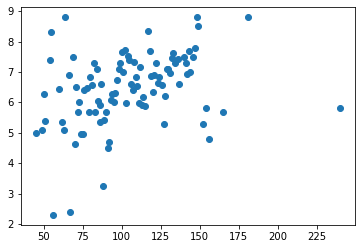

In [74]:
avg_rating = action_adventure.groupby('runtime_minutes').mean()
avg_rating.drop(['ordering_x', 'start_year', 'birth_year'], 1, inplace=True)
avg_rating.reset_index(inplace=True)
plt.scatter(avg_rating['runtime_minutes'], avg_rating['averagerating']);


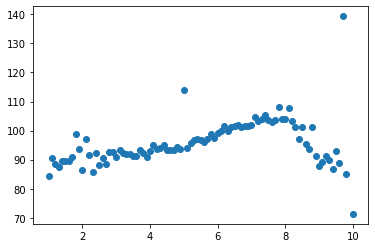

In [75]:
avg_rating = final_merge.groupby('averagerating').mean()
avg_rating.drop(['ordering_x', 'start_year', 'birth_year'], 1, inplace=True)
avg_rating.reset_index(inplace=True)
plt.scatter(avg_rating['averagerating'], avg_rating['runtime_minutes']);

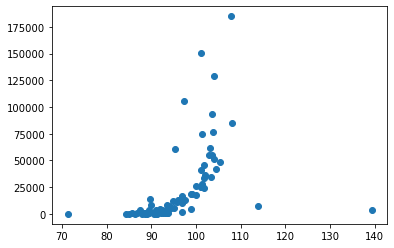

In [76]:
avg_rating = final_merge.groupby('averagerating').mean()
avg_rating.drop(['ordering_x', 'start_year', 'birth_year'], 1, inplace=True)
avg_rating.reset_index(inplace=True)
plt.scatter(avg_rating['runtime_minutes'], avg_rating['numvotes']);

In [77]:
final_merge['numvotes'].mean()


30390.034935440723

In [78]:
total_votes_30000 = final_merge[(final_merge['numvotes'] >= 20000)]

In [112]:
x = final_merge[(final_merge['averagerating'] >= 9)]
x = (x['numvotes'].values.mean())
x

1034.16801005694

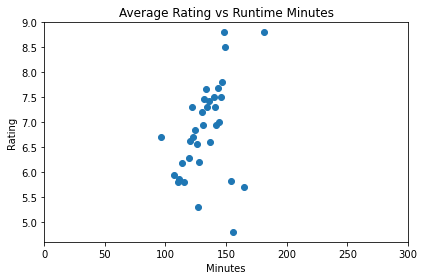

In [119]:
fig, ax = plt.subplots()

total_mean_votes = final_merge[final_merge['numvotes'] >= final_merge['numvotes'].values.mean()]

filter_genre = total_mean_votes[total_mean_votes['genres'] == 'Action,Adventure,Sci-Fi']
avg_rating = filter_genre.groupby('runtime_minutes').mean()
avg_rating.drop(['ordering_x', 'start_year', 'birth_year'], 1, inplace=True)
avg_rating.reset_index(inplace=True)

x = avg_rating['runtime_minutes']
y = avg_rating['averagerating']

ax.scatter(x,y)

ax.set_title('Average Rating vs Runtime Minutes')
ax.set_xlabel('Minutes')
ax.set_ylabel('Rating')
plt.xlim(0, 300)
plt.tight_layout()

In [118]:
avg_rating